# Load Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [75]:
train = pd.read_csv('train-Copy1.csv')

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [76]:
test = pd.read_csv('test-Copy1.csv')

print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


# Preprocessing

## Dates

In [77]:
train['Dates'] = pd.to_datetime(train['Dates'])

train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute
train['second'] = train['Dates'].dt.second

train[['Dates','year','month','day','hour','minute','second']].head()

,Dates,year,month,day,hour,minute,second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [78]:
test['Dates'] = pd.to_datetime(test['Dates'])

test['year'] = test['Dates'].dt.year
test['month'] = test['Dates'].dt.month
test['day'] = test['Dates'].dt.day
test['hour'] = test['Dates'].dt.hour
test['minute'] = test['Dates'].dt.minute
test['second'] = test['Dates'].dt.second

test[['Dates','year','month','day','hour','minute','second']].head()

,Dates,year,month,day,hour,minute,second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### minute

0.9772924050760383 1.3090463267948966 0.21351373862143277


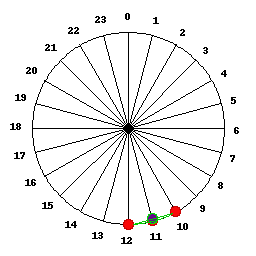

In [80]:
from PIL import Image, ImageDraw, ImageFont
import math 
sz = 128


def getxy(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return x, y


# def from_center(ratio):
#     return lambda z: sz + sz * ratio * z

# place34 = from_center(3/4)
# place78 = from_center(7/8)

# rad_to_deg = lambda x: 180 * x / 3.14159
 


    
    
# def  draw_circle(*points):
#     def draw_time_point(x1, y1, **kwargs):
    
#         draw.ellipse((place34(x1) - 5, 
#                       place34(y1) - 5,
#                       place34(x1) + 5,
#                       place34(y1) + 5),
#                      **kwargs)
        
        
#     im = Image.new('RGB',(2 * sz, 2*sz))
#     draw = ImageDraw.Draw(im)
#     draw.rectangle((0,0) + im.size, fill=(256, 256, 256))
#     draw.ellipse((sz / 4,
#                   sz / 4,
#                   sz * 7 / 4,
#                   sz * 7 / 4), outline = 0) 
    
#     for i in range(24):
#         x,y = getxy(i)
#         draw.line((sz,
#                    sz, 
#                    place34(x), 
#                    place34(y)),            
#                   fill = 0) 
        
#         draw.text((place78(x) - 5 - 2*y,  # slight rotation to align numbers 
#                    place78(y) - 5 + 2*x ), 
#                   str(i), 
#                   fill = 0)
        
 
#     if len(points):
#         xx, yy = list(zip(*[ getxy(p) for p in points]))
#         for x1, y1 in zip(xx, yy):
#             draw_time_point(x1, y1, outline = (200,5,5), fill=(250,9,9))
            
#         xm = sum(xx)/len(xx)
#         ym = sum(yy)/len(yy)
#         draw_time_point(xm, ym, outline = (0,215,5), fill=(100,9,139))
        
#         r = math.sqrt(xm**2 + ym**2)
#         avg = math.atan2(ym, xm)
#         arc = math.acos(r)
#         print(r,avg,arc)
        
#         draw.chord(xy=(sz/4,
#                        sz/4,
#                        sz * 7/4,
#                        sz * 7/4),
#                    start=rad_to_deg(avg - arc),
#                    end=rad_to_deg(avg + arc),
#                    outline=(0,200,0))
        
#     return im
# draw_circle(10,11,12)

In [81]:
train['minute(clean)'] = ((train['hour'] * 60) + train['minute']) / (24 * 60)

train[['minute','minute(clean)']]

,minute,minute(clean)
0,53,0.995139
1,53,0.995139
2,33,0.981250
3,30,0.979167
4,30,0.979167
...,...,...
878044,15,0.010417
878045,1,0.000694
878046,1,0.000694
878047,1,0.000694


In [82]:
test['minute(clean)'] = ((test['hour'] * 60) + test['minute']) / (24 * 60)

test[['minute','minute(clean)']]

,minute,minute(clean)
0,59,0.999306
1,51,0.993750
2,50,0.993056
3,45,0.989583
4,45,0.989583
...,...,...
884257,1,0.000694
884258,1,0.000694
884259,1,0.000694
884260,1,0.000694


In [83]:
train['minute(x)'] = train['minute(clean)'].apply(lambda x : getxy(x)).str[0].copy()
train['minute(y)'] = train['minute(clean)'].apply(lambda x : getxy(x)).str[1].copy()

print(train.shape)
train[['minute(clean)','minute(x)','minute(y)']].head()

(878049, 18)


,minute(clean),minute(x),minute(y)
0,0.995139,0.258115,-0.966114
1,0.995139,0.258115,-0.966114
2,0.981250,0.254601,-0.967046
3,0.979167,0.254073,-0.967185
4,0.979167,0.254073,-0.967185


In [84]:
test['minute(x)'] = test['minute(clean)'].apply(lambda x : getxy(x)).str[0].copy()
test['minute(y)'] = test['minute(clean)'].apply(lambda x : getxy(x)).str[1].copy()

print(test.shape)
test[['minute(clean)','minute(x)','minute(y)']].head()

(884262, 16)


,minute(clean),minute(x),minute(y)
0,0.999306,0.259168,-0.965832
1,0.993750,0.257763,-0.966208
2,0.993056,0.257588,-0.966255
3,0.989583,0.256710,-0.966489
4,0.989583,0.256710,-0.966489


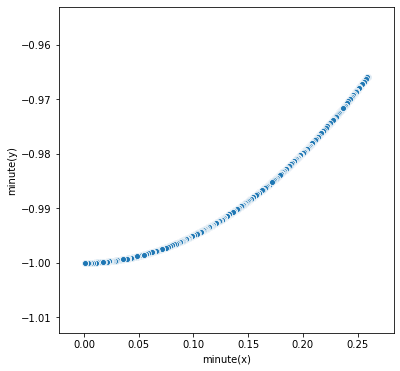

In [168]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=train, x='minute(x)', y='minute(y)')

## Address

In [85]:
def clean_address(address):
   
    if "/" not in address:
        return address
  
    address1, address2 = address.split("/")

    address1, address2 = address1.strip(), address2.strip()

    if address1 < address2:
        address = "{} / {}".format(address1, address2)
    else:
        address = "{} / {}".format(address2, address1)

    return address

train["Address(clean)"] = train["Address"].apply(clean_address)

print(train.shape)

train[["Address", "Address(clean)"]].head()

(878049, 19)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [86]:
test['Address(clean)'] = test['Address'].apply(clean_address)

print(test.shape)

test[['Address', 'Address(clean)']].head()

(884262, 17)


,Address,Address(clean)
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


### Division road

In [87]:
def cross_road(data):
    
    if '/' in data:
        
        return 'crossroad'
    
    else:
        
        return 'singleroad'


train['Cross_road'] = train['Address(clean)'].apply(cross_road)

train[['Cross_road','Address(clean)']].head()

,Cross_road,Address(clean)
0,crossroad,LAGUNA ST / OAK ST
1,crossroad,LAGUNA ST / OAK ST
2,crossroad,GREENWICH ST / VANNESS AV
3,singleroad,1500 Block of LOMBARD ST
4,singleroad,100 Block of BRODERICK ST


In [88]:
test['Cross_road'] = test['Address(clean)'].apply(cross_road)

test[['Cross_road','Address(clean)']].head()

,Cross_road,Address(clean)
0,singleroad,2000 Block of THOMAS AV
1,crossroad,3RD ST / REVERE AV
2,singleroad,2000 Block of GOUGH ST
3,singleroad,4700 Block of MISSION ST
4,singleroad,4700 Block of MISSION ST


In [89]:
train['Cross_road(clean)'] = train['Cross_road'] == 'crossroad'

train[['Cross_road', 'Cross_road(clean)']].head()

,Cross_road,Cross_road(clean)
0,crossroad,True
1,crossroad,True
2,crossroad,True
3,singleroad,False
4,singleroad,False


In [90]:
test['Cross_road(clean)'] = test['Cross_road'] == 'crossroad'

test[['Cross_road', 'Cross_road(clean)']].head()

,Cross_road,Cross_road(clean)
0,singleroad,False
1,crossroad,True
2,singleroad,False
3,singleroad,False
4,singleroad,False


In [91]:
len(train['Address(clean)'].unique())

17812

In [92]:
len(test['Address(clean)'].unique())

17772

## X, Y

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [94]:
train['X(clean)'] = scaler.fit_transform(train[['X']])

train['Y(clean)'] = scaler.fit_transform(train[['Y']])

print(train.shape)
train.head()

(878049, 23)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,...,minute,second,minute(clean),minute(x),minute(y),Address(clean),Cross_road,Cross_road(clean),X(clean),Y(clean)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,53,0,0.995139,0.258115,-0.966114,LAGUNA ST / OAK ST,crossroad,True,-0.107902,0.007832
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,53,0,0.995139,0.258115,-0.966114,LAGUNA ST / OAK ST,crossroad,True,-0.107902,0.007832
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,33,0,0.981250,0.254601,-0.967046,GREENWICH ST / VANNESS AV,crossroad,True,-0.057541,0.064335
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,30,0,0.979167,0.254073,-0.967185,1500 Block of LOMBARD ST,singleroad,False,-0.144262,0.065338
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,30,0,0.979167,0.254073,-0.967185,100 Block of BRODERICK ST,singleroad,False,-0.531112,0.001140


In [95]:
test['X(clean)'] = scaler.fit_transform(test[['X']])

test['Y(clean)'] = scaler.fit_transform(test[['Y']])

print(test.shape)
test.head()

(884262, 21)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,...,minute,second,minute(clean),minute(x),minute(y),Address(clean),Cross_road,Cross_road(clean),X(clean),Y(clean)
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,59,0,0.999306,0.259168,-0.965832,2000 Block of THOMAS AV,singleroad,False,0.745700,-0.075130
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,51,0,0.993750,0.257763,-0.966208,3RD ST / REVERE AV,crossroad,True,1.005982,-0.080531
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,50,0,0.993056,0.257588,-0.966255,2000 Block of GOUGH ST,singleroad,False,-0.106786,0.042772
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,45,0,0.989583,0.256710,-0.966489,4700 Block of MISSION ST,singleroad,False,-0.474449,-0.103262
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,45,0,0.989583,0.256710,-0.966489,4700 Block of MISSION ST,singleroad,False,-0.474449,-0.103262


# Train

## Preprocessing

### DayOfWeek

In [96]:
dayofweek = pd.get_dummies(train['DayOfWeek'], prefix = "DayOfWeek")

train = pd.concat([train, dayofweek], axis=1)

print(train.shape)
train.head(2)

(878049, 30)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,...,Cross_road(clean),X(clean),Y(clean),DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,-0.107902,0.007832,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,-0.107902,0.007832,0,0,0,0,0,0,1


In [97]:
dayofweek_test = pd.get_dummies(test['DayOfWeek'], prefix = "DayOfWeek")

test = pd.concat([test, dayofweek_test], axis=1)

print(test.shape)
test.head(2)

(884262, 28)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,...,Cross_road(clean),X(clean),Y(clean),DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,False,0.745700,-0.075130,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,True,1.005982,-0.080531,0,0,0,1,0,0,0


### PdDistrict

In [98]:
pddistrict_train = pd.get_dummies(train['PdDistrict'], prefix='PdDistrict')

train = pd.concat([train, pddistrict_train], axis=1)

print(train.shape)
train.head(2)

(878049, 40)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0


In [176]:
pddistrict_train

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [99]:
pddistrict_test = pd.get_dummies(test['PdDistrict'], prefix='PdDistrict')

test = pd.concat([test, pddistrict_test], axis=1)

print(test.shape)
test.head(2)

(884262, 38)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,1,0,0,0,0,0,0,0,0,0


### Address

In [100]:
train_address = train['Address(clean)'].value_counts()

more100_train_add = train_address[train_address >= 100]

more100_train_add_list = more100_train_add.index

more100_train_add_list

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       'BROADWAY ST / POWELL ST', '1800 Block of IRVING ST',
       '400 Block of SPEAR ST', '300 Block of BUCHANAN ST',
       '400 Block of PARNASSUS AV', '300 Block of ALEMANY BL',
       '500 Block of JACKSON ST', '700 Block of WEBSTER ST',
       'BEALE ST / BRYANT ST', '1800 Block of CHESTNUT ST'],
      dtype='object', length=1719)

In [101]:
train.loc[~train['Address(clean)'].isin(more100_train_add_list), 'Address(clean)'] = 'Others'

print(len(train['Address(clean)'].unique()))

train[['Address','Address(clean)']].head(2)

1720


,Address,Address(clean)
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others


In [102]:
test.loc[~test['Address(clean)'].isin(more100_train_add_list), 'Address(clean)'] = 'Others'

print(len(test['Address(clean)'].unique()))

test[['Address','Address(clean)']].head(2)

1720


,Address,Address(clean)
0,2000 Block of THOMAS AV,Others
1,3RD ST / REVERE AV,3RD ST / REVERE AV


In [103]:
enc_address_train = pd.get_dummies(train['Address(clean)'])

print(enc_address_train.shape)
enc_address_train

(878049, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
from scipy.sparse import csr_matrix

train_address = csr_matrix(enc_address_train)

train_address

<878049x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [105]:
enc_address_test = pd.get_dummies(test['Address(clean)'])

print(enc_address_test.shape)
enc_address_test

(884262, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_address = csr_matrix(enc_address_test)

test_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

### Featuring

In [107]:
features = ['X','Y', 'Cross_road(clean)']

add_features1 = ['year', 'month', 'day','minute(x)', 'minute(y)']

add_features2 = ['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 
                'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 
                'DayOfWeek_Wednesday']

add_features3 = ['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
                'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
                'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
                'PdDistrict_TENDERLOIN']

features = features + add_features1 + add_features2 + add_features3

features

['X',
 'Y',
 'Cross_road(clean)',
 'year',
 'month',
 'day',
 'minute(x)',
 'minute(y)',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [108]:
X_train = train[features]

print(X_train.shape)
X_train.head()

(878049, 25)


,X,Y,Cross_road(clean),year,month,day,minute(x),minute(y),DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,True,2015,5,13,0.258115,-0.966114,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,True,2015,5,13,0.258115,-0.966114,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,True,2015,5,13,0.254601,-0.967046,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,False,2015,5,13,0.254073,-0.967185,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,False,2015,5,13,0.254073,-0.967185,0,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
y_train = train['Category']

y_train.head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [110]:
X_test = test[features]

print(X_test.shape)
X_test.head()

(884262, 25)


,X,Y,Cross_road(clean),year,month,day,minute(x),minute(y),DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,False,2015,5,10,0.259168,-0.965832,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,True,2015,5,10,0.257763,-0.966208,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,False,2015,5,10,0.257588,-0.966255,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,False,2015,5,10,0.256710,-0.966489,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,False,2015,5,10,0.256710,-0.966489,0,0,...,0,0,1,0,0,0,0,0,0,0


### stack matrix - address

In [111]:
from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_address])

X_train = csr_matrix(X_train)

X_train

<878049x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 9041308 stored elements in Compressed Sparse Row format>

In [112]:
from scipy.sparse import hstack

X_test = hstack([X_test.astype('float'), test_address])

X_test = csr_matrix(X_test)

X_test

<884262x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 9104778 stored elements in Compressed Sparse Row format>

### coarse search

In [113]:
# 수학 연산을 편하게 해주는 numpy 패키지를 가져옵니다.
import numpy as np

# lightgbm 패키지에서 LGBMClassifier를 가져옵니다.
from lightgbm import LGBMClassifier

# hold-out validation용으로 쓰이는 train_test_split를 가져옵니다.
from sklearn.model_selection import train_test_split

# 경진대회에서 쓰이는 측정공식인 Log Loss를 가져옵니다.
from sklearn.metrics import log_loss

# train 데이터를 hold-out validation용으로 나눕니다.
X_train_HO, X_test_HO, y_train_HO, y_test_HO = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

# 트리의 갯수를 지정합니다.
n_estimators = 50

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_loop = 100

# early stopping을 할 횟수입니다.
early_stopping_rounds = 20

# coarse_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복합니다.
for loop in range(num_loop):
    # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMClassifier으로 만듭니다.
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습합니다. 여기에서 early-stopping을 사용합니다.
    model.fit(X_train_HO, y_train_HO,
              eval_set = [(X_test_HO, y_test_HO)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장합니다.
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()

 0 best iteration = 50 Score = 2.67297
 1 best iteration = 50 Score = 2.67634
 2 best iteration = 50 Score = 2.67635
 3 best iteration = 50 Score = 2.67635
 4 best iteration = 50 Score = 2.64435
 5 best iteration = 50 Score = 2.67635
 6 best iteration = 50 Score = 2.64859
 7 best iteration = 26 Score = 2.39342
 8 best iteration = 50 Score = 2.58427
 9 best iteration = 2 Score = 3.80132
10 best iteration = 50 Score = 2.62826
11 best iteration = 50 Score = 2.63192
12 best iteration = 50 Score = 2.67635
13 best iteration = 50 Score = 2.67626
14 best iteration = 50 Score = 2.67635
15 best iteration = 14 Score = 2.57681
16 best iteration = 50 Score = 2.67630
17 best iteration = 50 Score = 2.67635
18 best iteration = 50 Score = 2.61263
19 best iteration = 1 Score = 26.58963
20 best iteration = 1 Score = 9.81367
21 best iteration = 50 Score = 2.28718
22 best iteration = 27 Score = 2.39678
23 best iteration = 50 Score = 2.40442
24 best iteration = 50 Score = 2.67635
25 best iteration = 1 Score

,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
27,27,50,0.070702,405,492,296,0.990112,1,0.879950,balanced,37,2.271940
21,21,50,0.062075,474,483,312,0.831302,1,0.295947,balanced,37,2.287185
38,38,49,0.026159,194,434,44,0.705795,1,0.949841,balanced,37,2.357345
28,28,50,0.026952,134,338,217,0.433210,1,0.359886,balanced,37,2.392128
7,7,26,0.060042,302,89,258,0.120404,1,0.956463,balanced,37,2.393424


In [114]:
coarse_hyperparameters_list.head(2)

,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
27,27,50,0.070702,405,492,296,0.990112,1,0.879950,balanced,37,2.271940
21,21,50,0.062075,474,483,312,0.831302,1,0.295947,balanced,37,2.287185


In [138]:
10 ** -1.2070838

0.06207492449904907

In [147]:
a = 0.062075

x = math.log10(a)

x

-1.2070832717733981

In [146]:
10 ** x

0.07070199999999999

### Finer search

In [151]:
# 수학 연산을 편하게 해주는 numpy 패키지를 가져옵니다.
import numpy as np

# lightgbm 패키지에서 LGBMClassifier를 가져옵니다.
from lightgbm import LGBMClassifier

# hold-out validation용으로 쓰이는 train_test_split를 가져옵니다.
from sklearn.model_selection import train_test_split

# 경진대회에서 쓰이는 측정공식인 Log Loss를 가져옵니다.
from sklearn.metrics import log_loss

# train 데이터를 hold-out validation용으로 나눕니다.
X_train_HO, X_test_HO, y_train_HO, y_test_HO = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

# 트리의 갯수를 지정합니다.
n_estimators = 50

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_loop = 100

# early stopping을 할 횟수입니다.
early_stopping_rounds = 20

# finer_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
finer_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복합니다.
for loop in range(num_loop):
    # Coarse Search를 통해 범위를 좁힌 하이퍼패러미터를 찾습니다.
    learning_rate = 10 ** np.random.uniform(low = -1.2070832717733981, high = -1.150568300818681)
    num_leaves = np.random.randint(405, 474)
    max_bin = np.random.randint(483, 492)
    min_child_samples = np.random.randint(296, 312) 
    subsample = np.random.uniform(low = 0.831302, high = 0.990112)
    colsample_bytree = np.random.uniform(low = 0.295947, high = 0.879950)
    
    # 이를 LGBMClassifier으로 만듭니다.
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습합니다. 마찬가지로 early-stopping을 사용합니다.
    model.fit(X_train_HO, y_train_HO,
              eval_set = [(X_test_HO, y_test_HO)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)
    
    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장합니다.
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    finer_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")

finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 best iteration = 50 Score = 2.27076
 1 best iteration = 49 Score = 2.27028
 2 best iteration = 50 Score = 2.27812
 3 best iteration = 50 Score = 2.27309
 4 best iteration = 50 Score = 2.26962
 5 best iteration = 50 Score = 2.26916
 6 best iteration = 49 Score = 2.26991
 7 best iteration = 47 Score = 2.27281
 8 best iteration = 50 Score = 2.27567
 9 best iteration = 50 Score = 2.28759
10 best iteration = 50 Score = 2.28479
11 best iteration = 50 Score = 2.27854
12 best iteration = 50 Score = 2.26448
13 best iteration = 35 Score = 2.30239
14 best iteration = 50 Score = 2.26924
15 best iteration = 2 Score = 2.57572
16 best iteration = 50 Score = 2.27561
17 best iteration = 27 Score = 2.31704
18 best iteration = 50 Score = 2.27161
19 best iteration = 50 Score = 2.26919
20 best iteration = 50 Score = 2.26768
21 best iteration = 50 Score = 2.29185
22 best iteration = 42 Score = 2.43052
23 best iteration = 49 Score = 2.27109
24 best iteration = 2 Score = 2.57668
25 best iteration = 50 Scor

,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
71,71,50,0.067423,457,491,299,0.836630,1,0.516239,balanced,37,2.263696
84,84,50,0.070261,471,486,304,0.848805,1,0.763402,balanced,37,2.263960
93,93,50,0.068146,473,486,310,0.967923,1,0.573772,balanced,37,2.264050
69,69,50,0.068875,450,487,302,0.974184,1,0.478977,balanced,37,2.264104
12,12,50,0.069669,437,483,309,0.833558,1,0.693245,balanced,37,2.264481


# Predict

In [152]:
# finer search로 찾은 가장 좋은 하이퍼패러미터만을 가져옵니다.
best_hyperparameters = finer_hyperparameters_list.iloc[0]

# 이를 best_hyperparameters라는 값에 저장합니다.
best_hyperparameters

loop                        71
n_estimators                50
learning_rate        0.0674233
num_leaves                 457
max_bin                    491
min_child_samples          299
subsample              0.83663
subsample_freq               1
colsample_bytree      0.516239
class_type            balanced
random_state                37
score                   2.2637
Name: 71, dtype: object

In [153]:
from lightgbm import LGBMClassifier

# 가장 좋은 하이퍼패러미터로 LGBMClassifier를 만듭니다.
model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.516239363645076, importance_type='split',
               learning_rate=0.06742332976852392, max_bin=491, max_depth=-1,
               min_child_samples=299, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=457,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.8366303215658807,
               subsample_for_bin=200000, subsample_freq=1)

In [154]:
# scikit-learn의 model_selection 모듈에서 train_test_split 함수를 가져옵니다.
# 이 함수는 데이터를 일정 비율로 두 개로 쪼개는 역할을 담당합니다.
from sklearn.model_selection import train_test_split

# train 데이터를 두 개로 쪼갭니다. 쪼개는 비율은 7:3으로 할 것이며
# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어갑니다.
# 실행할때마다 매 번 동일한 결과가 나오도록 하기 위해 random_state 옵션을 줘서 seed를 고정시킵니다.
X_train_HO, X_test_HO, y_train_HO, y_test_HO = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

# X_train_kf와 y_train_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train_HO.shape, y_train_HO.shape)

# X_test_kf와 y_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test_HO.shape, y_test_HO.shape)

(702439, 1745) (702439,)
(175610, 1745) (175610,)


In [155]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model.fit(X_train_HO, y_train_HO)

Wall time: 3min 12s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.516239363645076, importance_type='split',
               learning_rate=0.06742332976852392, max_bin=491, max_depth=-1,
               min_child_samples=299, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=457,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.8366303215658807,
               subsample_for_bin=200000, subsample_freq=1)

In [156]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# predict가 아닌 predict_proba를 사용하는 이유는, 아래서 사용할 log loss 공식에서 확률을 이용하기 때문입니다.
# 이 결과를 y_predict_test_kf라는 이름의 변수에 할당합니다.
y_predict_test_HO = model.predict_proba(X_test_HO)

# y_predict_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(y_predict_test_HO.shape)

# y_predict_test_kf를 화면에 출력합니다.
y_predict_test_HO

(175610, 39)


array([[1.44249936e-03, 5.53602320e-02, 3.09830117e-05, ...,
        6.38667065e-03, 2.53770208e-02, 1.26692470e-02],
       [8.03064664e-04, 6.90486381e-02, 2.40857821e-05, ...,
        9.82268959e-02, 1.43299436e-02, 5.66201389e-03],
       [3.90285587e-04, 5.52065302e-02, 1.58181384e-04, ...,
        3.15709554e-02, 3.17015576e-02, 5.52475721e-03],
       ...,
       [1.81356974e-03, 5.35359926e-02, 3.60668601e-05, ...,
        8.57057585e-02, 4.88234455e-02, 5.28256289e-03],
       [3.91174805e-03, 1.06870709e-01, 4.73324676e-05, ...,
        6.92197903e-02, 8.58510469e-02, 5.22799022e-03],
       [8.54367967e-04, 1.70773539e-01, 4.19323017e-05, ...,
        4.78484690e-02, 5.70298561e-02, 6.53540356e-03]])

In [157]:
# scikit-learn의 측정 공식(metrics) 모듈에서 log_loss 함수를 가져옵니다.
from sklearn.metrics import log_loss

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log lsos의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = log_loss(y_test_HO, y_predict_test_HO)

# score 변수에 할당한 점수를 출력합니다.
print(f"Score = {score:.5f}")

Score = 2.26370


In [161]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: class_type
Wall time: 3min 36s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.516239363645076, importance_type='split',
               learning_rate=0.06742332976852392, max_bin=491, max_depth=-1,
               min_child_samples=299, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=457,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.8366303215658807,
               subsample_for_bin=200000, subsample_freq=1)

In [162]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# 이 결과를 prediction_list라는 이름의 변수에 할당합니다.
prediction_list = model.predict_proba(X_test)

# prediction_list라는 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(prediction_list.shape)

# prediction_list를 화면에 출력합니다.
prediction_list

(884262, 39)


array([[2.05810368e-03, 1.18151359e-01, 3.03212114e-05, ...,
        2.61610072e-01, 2.75178466e-02, 1.77261132e-02],
       [7.30172616e-04, 4.78739945e-02, 1.39324875e-05, ...,
        2.58980886e-02, 7.75386371e-02, 4.30553120e-02],
       [2.23041286e-03, 9.21112649e-02, 4.29580912e-05, ...,
        5.57413572e-02, 4.14146051e-02, 7.04323528e-03],
       ...,
       [6.12761399e-04, 1.04043901e-01, 9.85389249e-04, ...,
        4.50047010e-02, 1.76571396e-02, 3.21888487e-03],
       [5.46603445e-04, 9.64812428e-02, 1.21944107e-03, ...,
        8.63582720e-02, 1.29004328e-02, 6.98861755e-03],
       [1.04450189e-03, 7.36982950e-02, 1.03322499e-03, ...,
        3.53750904e-02, 1.86713651e-02, 6.22383775e-03]])

In [164]:
sample_submission = pd.read_csv("sampleSubmission.csv", index_col = "Id")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)

print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002058,0.118151,0.000030,0.000038,0.030112,0.001088,0.002421,0.014871,0.001473,0.002130,...,0.000011,0.012420,0.000134,0.041813,8.342228e-08,0.009947,0.057387,0.261610,0.027518,0.017726
1,0.000730,0.047874,0.000014,0.000037,0.005099,0.001237,0.012225,0.040291,0.003996,0.000126,...,0.000005,0.012527,0.000340,0.035119,6.661552e-08,0.001453,0.017145,0.025898,0.077539,0.043055
2,0.002230,0.092111,0.000043,0.000022,0.137888,0.000982,0.001598,0.016607,0.003937,0.000133,...,0.000008,0.007006,0.000048,0.039963,6.119316e-08,0.010376,0.081098,0.055741,0.041415,0.007043
3,0.001025,0.166804,0.000024,0.000257,0.023956,0.004563,0.001499,0.034696,0.009550,0.000270,...,0.000012,0.004629,0.000038,0.051366,9.319021e-08,0.013412,0.082999,0.042092,0.046457,0.029465
4,0.001025,0.166804,0.000024,0.000257,0.023956,0.004563,0.001499,0.034696,0.009550,0.000270,...,0.000012,0.004629,0.000038,0.051366,9.319021e-08,0.013412,0.082999,0.042092,0.046457,0.029465


In [165]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("sf-crime-2.26370.csv")